Import the necessary libraries

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Load the dataset

In [22]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Create column names

In [23]:
column_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = column_names
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Explanatory data analysis on the data

In [24]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [25]:
# Bare Nuclei is a categorical variable, so we'll convert it to a numeric variable
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [26]:
# check for missing values
df.isnull().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [27]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Id                             0.000000
Clump_thickness                0.000000
Uniformity_Cell_Size           0.000000
Uniformity_Cell_Shape          0.000000
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.000000
Bare_Nuclei                    2.288984
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
Class                          0.000000
dtype: float64


In [28]:
# drop missing values
df = df.dropna()
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [29]:
# drop missing values
df = df.dropna()
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [30]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Define the independent and dependent variable from the dataset

In [31]:
brest_cancer = df.to_csv('brest_cancer.csv', index=False)

In [32]:
# Define X and y
X = df.drop(columns=['Class', 'Id'], axis=1).values
y = df['Class'].values

print(X.shape, y.shape)

(683, 9) (683,)


Iniatiliza the KNN model and fit the model

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Create new set of independent variable to determine the predicted response

In [34]:
X_new = np.array([[4, 2, 1, 1, 1, 2, 1, 3, 1],
                  [8, 8, 8, 8, 8, 8, 8, 8, 8],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [8, 7, 9, 3, 4, 8, 8, 9, 7],
                  [10, 8, 8, 10, 10, 8, 8, 10, 9],
                  [9, 7, 8, 7, 10, 9, 8, 9, 8],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1],])

Predict their outcome

In [35]:
y_pred = knn.predict(X_new)
print('Predictions: {}'.format(y_pred))

Predictions: [2 4 2 4 4 4 2 2 2 2 2]


Each number signifies the level of the cancer

Measuring Model Performance

Accuracy is the most commonly use measure of performance in classificaiton and is mathematically expressed as:

accuracy = correct predictions/total_observations

To determine accuracy the data is split into Train and Test dataset. The train dataset is to train and fit the model while the test set is to determine the accuracy of the system.

In the example below the data use for training is 80% (0.80) while test data is 20% (0.20)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy: 0.95


Effect of k

The larger the k the less complex the model but is prone to underfitting while smaller k values make the model more complex and might lead to overfitting

Model Complexity and Model Fitness

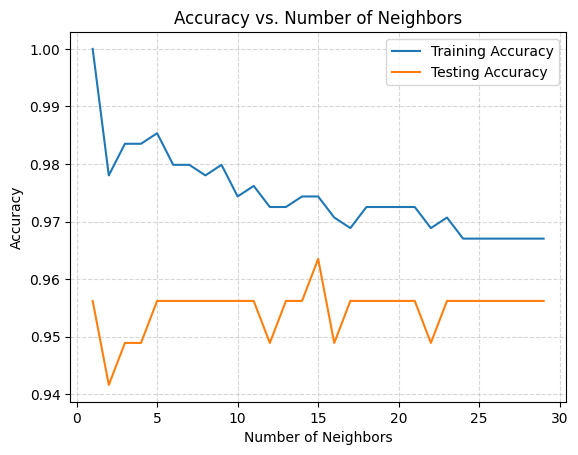

In [37]:
train_accuracy = {}
test_accuracy = {}
neighbors_settings = np.arange(1, 30)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_accuracy[n_neighbors] = knn.score(X_train, y_train)
    test_accuracy[n_neighbors] = knn.score(X_test, y_test)
    
plt.plot(neighbors_settings, train_accuracy.values(), label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy.values(), label='Testing Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

Confusion Matrix and Classification Report 

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[85  4]
 [ 3 45]]


In [39]:
# Classification Report
class_reoprt = classification_report(y_test, y_pred)
print(class_reoprt)

              precision    recall  f1-score   support

           2       0.97      0.96      0.96        89
           4       0.92      0.94      0.93        48

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137

